### Student Information
Name: 陳剛頡

Student ID: R13944050

GitHub ID: R13944050

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

# **First Part**

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [ ]:
# Answer here
for data in twenty_train.data[:3]:
    print(data)

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
#Answer 
X.loc[(X["category"] < 1 ) | (X["category_name"] == "sci.med")]

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [ ]:
# Answer here
X.loc[X["category_name"] == "sci.med"].iloc[::10].head(5)

### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [ ]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

for _, row in NA_df.iterrows():
    print(type(row.missing_example))

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
""" The order of the data are changed, and the distribution of four categories are different."""

X.head(10)
X_sample.head(10)

total = len(X)
print(len(X[X["category"] == 0]) / total)
print(len(X[X["category"] == 1]) / total)
print(len(X[X["category"] == 2]) / total)
print(len(X[X["category"] == 3]) / total)

total_sample = len(X_sample)
print(len(X_sample[X_sample["category"] == 0]) / total_sample)
print(len(X_sample[X_sample["category"] == 1]) / total_sample)
print(len(X_sample[X_sample["category"] == 2]) / total_sample)
print(len(X_sample[X_sample["category"] == 3]) / total_sample)

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [ ]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts()) + 10
X_sample.category_name.value_counts().plot(kind="bar",
                                           title="category distribution",
                                           ylim=[0, upper_bound],
                                           rot=0, fontsize=11, figsize=(10, 3))

# X_sample.category_name.value_counts().plot(kind="pie")

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [ ]:
# Answer here
combined_df = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
combined_df.columns = ["X_count", "X_sample_count"]
print(combined_df)
upper_bound = max(max(X.category_name.value_counts()), max(X_sample.category_name.value_counts())) + 50
combined_df.plot(kind="bar", title="category distribution", ylim=[0, upper_bound], fontsize=11, figsize=(6, 5), rot=0)

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [ ]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
sample = X_counts[4, 0:100].toarray()
indice = np.argwhere(sample == 1)
for coord in indice:
    print(count_vect.get_feature_names_out()[coord[1]])

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# Answer here
X_counts_array = X_counts.toarray()
document_frequency = np.sum((X_counts_array > 0), axis=0)
sorted_indices = np.argsort(document_frequency)[::-1]
document_frequency = document_frequency[sorted_indices]
terms = count_vect.get_feature_names_out()[sorted_indices]
filtered_indices = np.where((document_frequency < 500) & (document_frequency > 100))
document_frequency = document_frequency[filtered_indices]
terms = terms[filtered_indices]

absolute_indices = sorted_indices[filtered_indices]
top_20_terms = terms[:20]
doc_indices = list(X.index)
sampled_doc_indices = np.random.choice(doc_indices, size=20, replace=False)

plot_x = ["term_"+str(s) for s in top_20_terms]
plot_y = ["doc_"+str(i) for i in sampled_doc_indices]
plot_z = X_counts_array[np.ix_(sampled_doc_indices, absolute_indices[:20])]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
df_todraw
plt.subplots(figsize=(15, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[0:300], y=term_frequencies[:300])
fig.show()

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [ ]:
# Answer here
indice = np.where(term_frequencies > 10)
terms = count_vect.get_feature_names_out()[indice]

fig = px.bar(x=terms[:30], y=term_frequencies[indice][:30])
fig.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [ ]:
# Answer here
indice = np.argsort(term_frequencies)
sorted_term_frequencies = term_frequencies[indice][::-1]
terms = count_vect.get_feature_names_out()[indice][::-1]

fig = px.bar(x=terms[:100], y=sorted_term_frequencies[:100])
fig.show()

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [ ]:
# Answer here
indices = np.argsort(term_frequencies)
sorted_term_frequencies = term_frequencies[indices][::-1]
sorted_term_frequencies_log = [math.log(i) for i in sorted_term_frequencies]
terms = count_vect.get_feature_names_out()[indices][::-1]

fig = px.bar(x=terms[:200], y=sorted_term_frequencies_log[:200])
fig.show()

""" The logarithmic transformation reduces the skewness caused by the outliers and make it easier to compare the relative importance of terms with lower frequencies.
And it is easier to visualize data that spans several order of magnitude."""

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [ ]:
# Answer here
""" The 5% words of every category all contain the stopwords like 'the', 'a', and etc. 
The bottom 1% words of every category do not overlap since they usually appears only once."""

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [ ]:
# Answer Here
""" The runtime of FAE:
        top 500: 1.0625
        top 1000: 2.0986
        top 1500: 5.2523
"""
""" The runtime of MaxFPGrowth:
        minimum support threshold 3: 21.3644
        minimum support threshold 6: 0.3508
        minimum support threshold 9: 0.1622
"""
"""_summary_
        The results of the two methods are the subsets of the previous result of FPGrowth algorithm. On one hand, the result of FAE consists of the high frequency pattern of the FPGrowth result,
        while on the other hand, the result of MaxFPGrowth mainly contain larger patterns of the original results and avoid the overlapping items that show up in several patterns.
"""

In [ ]:
# FAE Top-K
from PAMI.frequentPattern.topk import FAE  as alg

kCount=500  #Users can also specify this constraint between 0 to 1.
seperator='\t'
inputFile = "td_freq_db_comp_graphics.csv"
obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process
obj.save(outFile=f'frequentPatternsMinSupCount{kCount}.txt')
frequentPatternsDF= obj.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

frequentPatternsDF

In [ ]:
# MaxFPGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm

minimumSupportCount = 3  #minSup is specified in count. However, the users can also specify minSup between 0 and 1.
inputFile = "td_freq_db_comp_graphics.csv"
obj = alg.MaxFPGrowth(iFile=inputFile, minSup=minimumSupportCount, sep='\t') #initialize
obj.mine()            #start the mining process

obj.save(f'maximalFrequentPatternsAtMinSupCount{minimumSupportCount}.txt') #save the patterns

frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

frequentPatternsDF

### **>>> Exercise 18 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
# Answer here

""" The results of TSNE and UMAP method both lie on planes that do not cross over one axis much, 
which means that the results still stay in a two dimension space. And the PCA also stay in a small group like in 2D space. """


from mpl_toolkits.mplot3d import Axes3D
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
axes = []
axes.append(fig.add_subplot(131, projection='3d'))
axes.append(fig.add_subplot(132, projection='3d'))
axes.append(fig.add_subplot(133, projection='3d'))

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
        ax.view_init(elev=120, azim=30) # change the angle to observe the data
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here
""" This also changes the category names into the same binary vectors of categories."""

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

# **Second Part**

In [135]:
from datasets import load_dataset
dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

In [136]:
import pandas as pd

# convert the dataset into dataframe format
df = pd.DataFrame({"sentiment":dataset["train"]["sentiment"], "comment":dataset["train"]["comment"]})

# exercise 1
for data in df.comment[:3]:
    print(data)


He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


In [137]:
# exercise 2
df.loc[(df["sentiment"] == "nostalgia" )]

,sentiment,comment
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
...,...,...
1488,nostalgia,Yup !!!! Bringing back an Enormous amount of ...
1491,nostalgia,real music...how i miss those days...brings ba...
1492,nostalgia,i used to cry over this song cause i had a boy...
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [138]:
# exercise 3
df.loc[df["sentiment"] == "not nostalgia"].iloc[::10].head(5)

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
24,not nostalgia,I like the part I'm a steam roller baby guaran...
51,not nostalgia,Someone says it' about a tom girl. That is a p...
67,not nostalgia,"Tommy, No doubt, its just so weird, has a unbe..."
89,not nostalgia,I always hear this song at my job and wondered...


In [139]:
def check_missing_values(row):
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

# exercise 4
df.isnull().apply(lambda x: check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [140]:
# add dummy record to the dataset
dummy_series = pd.Series(["dummy comment"], index=["comment"]).to_frame().T
dummy_df = pd.concat([df, dummy_series], ignore_index=True)

print(len(df))
print(len(dummy_df))

1500
1501


In [141]:
# check missing value
dummy_df.isnull().apply(lambda x: check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,1,0


In [142]:
# drop the record with missing value and check again
dummy_df.dropna(inplace=True)
dummy_df.isnull().apply(lambda x: check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [143]:
# check whether the dataframe exists duplicate record
import numpy as np

# find the duplicate records
duplicate_idx = np.where(df.duplicated(keep=False))
print(df.iloc[duplicate_idx])

# drop the duplicate records
print(f"length before dropping duplicates: {len(df)}")
df = df.drop_duplicates(keep="first")
print(f"length after dropping duplicates: {len(df)}")


        sentiment                                            comment
62  not nostalgia  never heard this song before... WOW What an am...
78  not nostalgia  never heard this song before... WOW What an am...
length before dropping duplicates: 1500
length after dropping duplicates: 1499


In [144]:
# random sampling
df_sample = df.sample(n=750)

# observe the difference of distribution of categories between the original dataset and sampled dataset 
total = len(df)
print(len(df[df["sentiment"] == "nostalgia"]) / total)
print(len(df[df["sentiment"] == "not nostalgia"]) / total)

total_sample = len(df_sample)
print(len(df_sample[df_sample["sentiment"] == "nostalgia"]) / total_sample)
print(len(df_sample[df_sample["sentiment"] == "not nostalgia"]) / total_sample)

0.5003335557038026
0.49966644429619744
0.488
0.512


sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

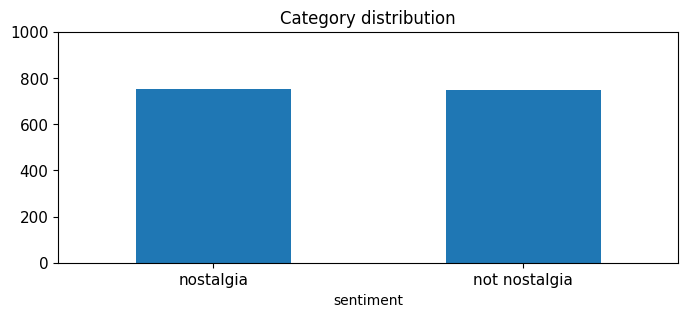

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

print(df["sentiment"].value_counts())

# plot bar chart for the categories of the dataset
df["sentiment"].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
not nostalgia    384
nostalgia        366
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

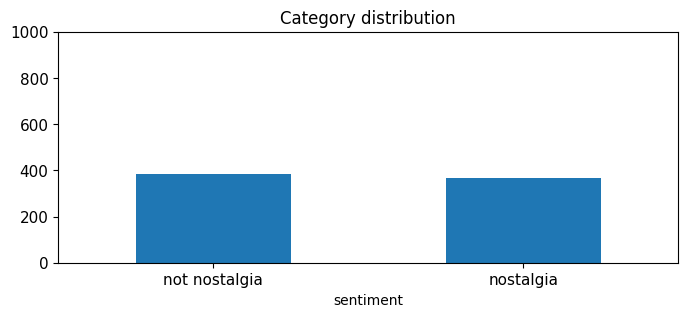

In [146]:
print(df_sample["sentiment"].value_counts())

# plot bar chart for the categories of the sampled dataset
df_sample["sentiment"].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'category distribution'}, xlabel='sentiment'>

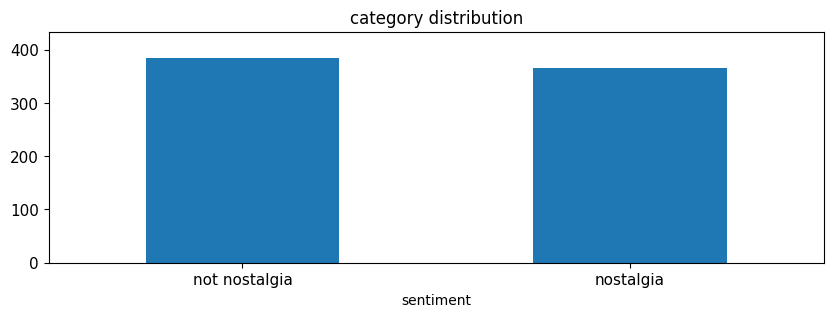

In [147]:
# exercise 7
upper_bound = max(df_sample["sentiment"].value_counts()) + 50
df_sample["sentiment"].value_counts().plot(kind="bar",
                                           title="category distribution",
                                           ylim=[0, upper_bound],
                                           rot=0, fontsize=11, figsize=(10, 3))

               df_count  df_sample_count
sentiment                               
nostalgia           750              366
not nostalgia       749              384


<Axes: title={'center': 'category distribution'}, xlabel='sentiment'>

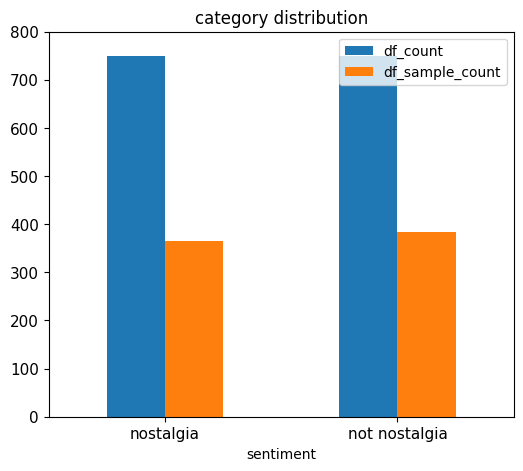

In [148]:
# exercise 8
combined_df = pd.concat([df["sentiment"].value_counts(), df_sample["sentiment"].value_counts()], axis=1)
combined_df.columns = ["df_count", "df_sample_count"]
print(combined_df)
upper_bound = max(max(df["sentiment"].value_counts()), max(df_sample["sentiment"].value_counts())) + 50
combined_df.plot(kind="bar", title="category distribution", ylim=[0, upper_bound], fontsize=11, figsize=(6, 5), rot=0)

In [149]:
import nltk

# create an extra feature by tokenizing the comments into unigrams
def tokenize_text(text):
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens
    
df['unigrams'] = df['comment'].apply(lambda x: tokenize_text(x))
print(df["unigrams"])

0       [He, was, a, singer, with, a, golden, voice, t...
1       [The, mist, beautiful, voice, ever, I, listene...
2       [I, have, most, of, Mr., Reeves, songs, ., Alw...
3       [30, day, leave, from, 1st, tour, in, Viet, Na...
4       [listening, to, his, songs, reminds, me, of, m...
                              ...                        
1495    [i, do, n't, know, !, .., but, the, opening, o...
1496    [it, 's, sad, this, is, such, a, beautiful, so...
1497    [Dear, Friend, ,, I, think, age, and, time, is...
1498    [I, was, born, in, 1954, and, started, to, be,...
1499    [This, is, the, first, CD, I, bought, after, m...
Name: unigrams, Length: 1499, dtype: object


In [150]:
from sklearn.feature_extraction.text import CountVectorizer

# build the document-term matrix with scikit-learn
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df["comment"]) #learn the vocabulary and return document-term matrix
print(df_counts[0])
print(type(df_counts))

feature_names = count_vect.get_feature_names_out()
print(feature_names[1598], feature_names[3570], feature_names[2973], feature_names[3650])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1
<class 'scipy.sparse._csr.csr_matrix'>
he was singer with


In [151]:
# build the analyzer
analyzer = count_vect.build_analyzer()

# exercise 9
analyzer(df["comment"][0]) # the stopwords are removed

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [152]:
# overview of the first 5 record
print(df_counts[:5, :100].toarray())

# find the terms that frequencies greater than 1 in the third record 
print("Terms with frequencies > 1 in 3rd record:")
sample = df_counts[3, 0:100].toarray()
indices = np.argwhere(sample > 0)
for coord in indices:
    print(feature_names[coord[1]])
    

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

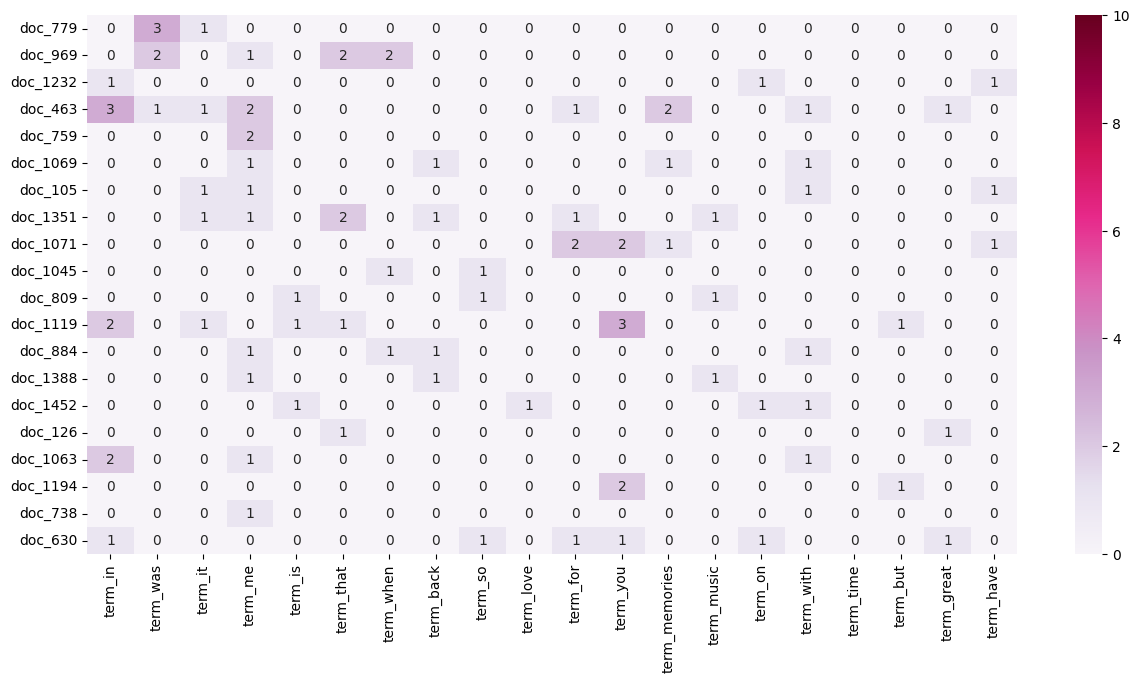

In [153]:
# exercise 11
import seaborn as sns

df_counts_array = df_counts.toarray()
document_frequency = np.sum((df_counts_array > 0), axis=0)
sorted_indices = np.argsort(document_frequency)[::-1]
document_frequency = document_frequency[sorted_indices]
terms = count_vect.get_feature_names_out()[sorted_indices]
filtered_indices = np.where((document_frequency < 500) & (document_frequency > 100))
document_frequency = document_frequency[filtered_indices]
terms = terms[filtered_indices]

absolute_indices = sorted_indices[filtered_indices]
top_20_terms = terms[:20]
doc_indices = list(df.index)
sampled_doc_indices = np.random.choice(doc_indices, size=20, replace=False)

plot_x = ["term_"+str(s) for s in top_20_terms]
plot_y = ["doc_"+str(i) for i in sampled_doc_indices]
plot_z = df_counts_array[np.ix_(sampled_doc_indices, absolute_indices[:20])]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
df_todraw
plt.subplots(figsize=(15, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

/tmp/ipykernel_13496/3962145163.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



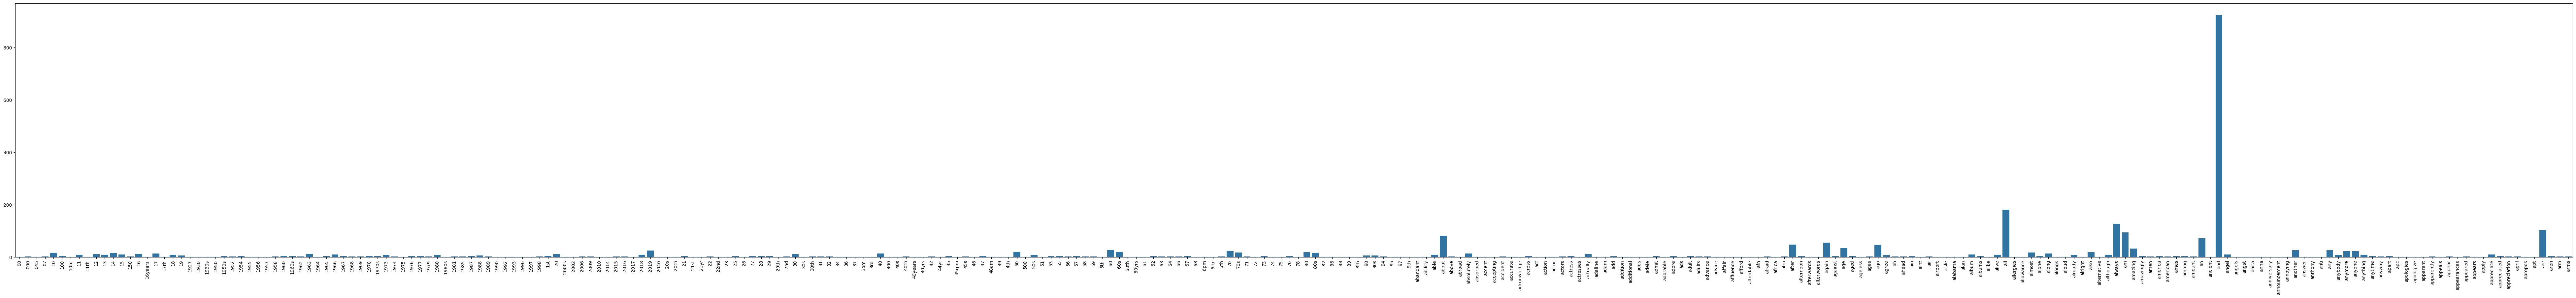

In [154]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=feature_names[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(feature_names[:300], rotation = 90);

In [155]:
# exercise 12
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[0:300], y=term_frequencies[:300])
fig.show()

In [156]:
# exercise 13
indices = np.where(term_frequencies > 10)
terms = count_vect.get_feature_names_out()[indices]

fig = px.bar(x=terms[:30], y=term_frequencies[indices][:30])
fig.show()

In [157]:
# exercise 14
indices = np.argsort(term_frequencies)
sorted_term_frequencies = term_frequencies[indices][::-1]
terms = count_vect.get_feature_names_out()[indices][::-1]

fig = px.bar(x=terms[:100], y=sorted_term_frequencies[:100])
fig.show()

/tmp/ipykernel_13496/3646442887.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



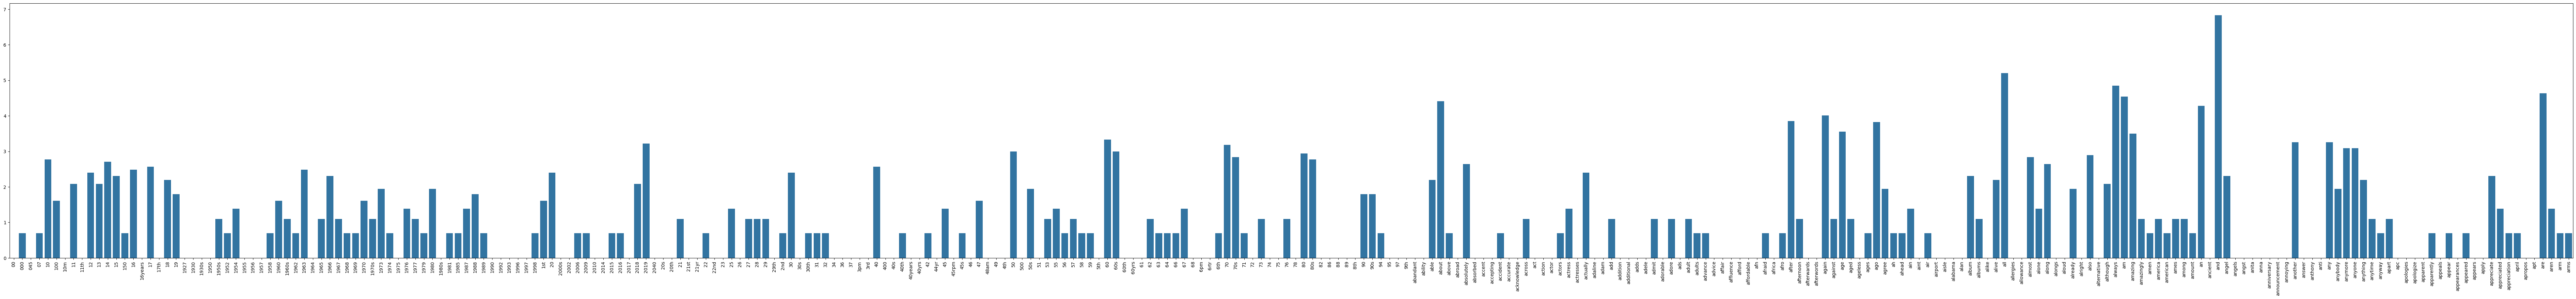

In [158]:
# take the logarithm of the term frequency
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [159]:
# exercise 15
indices = np.argsort(term_frequencies)
sorted_term_frequencies = term_frequencies[indices][::-1]
sorted_term_frequencies_log = [math.log(i) for i in sorted_term_frequencies]
terms = count_vect.get_feature_names_out()[indices][::-1]

fig = px.bar(x=terms[:200], y=sorted_term_frequencies_log[:200])
fig.show()

In [160]:
#Create separate DataFrames for each category
categories = df["sentiment"].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df["sentiment"] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df["comment"])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [161]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 # You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


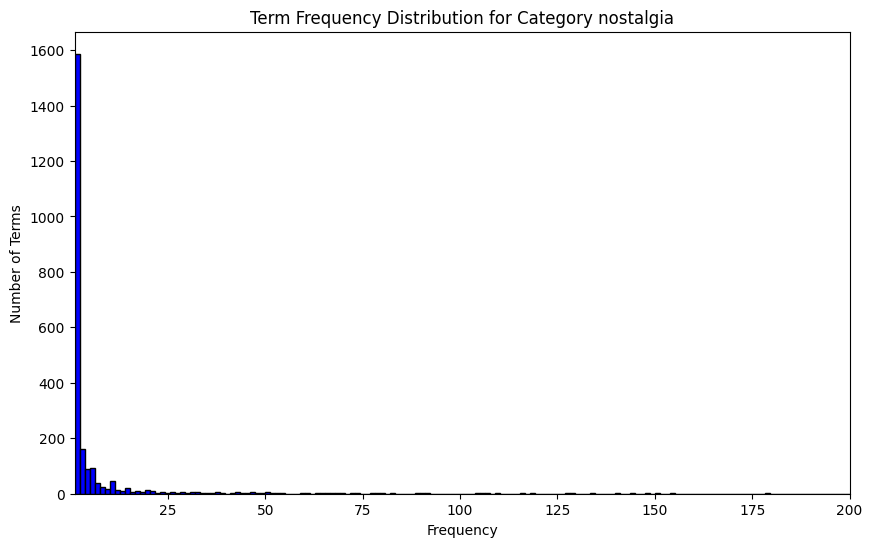

In [162]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [163]:
# Filter out the top 5% terms

category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'can', 'me', 'voice', 'just', 'songs', 'beautiful', 'as', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'never', 'now', 'about', 'much', 'who', 'really', 'more', 'if', 'we', 'best', 'by', 'ever', 'think', 'would', 'thank', 'only', 'still', 'how', 'don', 'has', 'very', 'am', 'there', 'out', 'him', 'could', 'these', 'up', 'old', 'listen', 'hear', 'do', 'an', 'singer', 'many', 'had', 'here', 'version', 'too', 'such', 'today', 'been', 'world', 'your', 'people', 'most', 'get', 'video', 'heard', 'man', 'some', 'listening', 'sing', 'than', 'were', 'years', 'real', 'heart', 'nice', 'singing', 'their', 'better', 'life', 'its', 'day', 'sad', 'god', 'then', 'way', '

In [164]:
# Filter out the bottom 1% terms

category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['12', '16years', 'zealand', 'sensitive', 'sense', 'xd', 'wwii', 'wuv', 'writers', 'writer', 'wrenching', 'wouldn', '1998', 'measure', 'spine', 'spewing', '2040', '2018', '2017', '2010', '1957', '1955', '1952', '1930s', '1930', '17th']


In [165]:
category_number=1 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
amazing     23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2

,07,10,11,12,13,14,15,16,17,18,...,yesterday,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation'
    category_safe = category.replace(' ', '_')
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


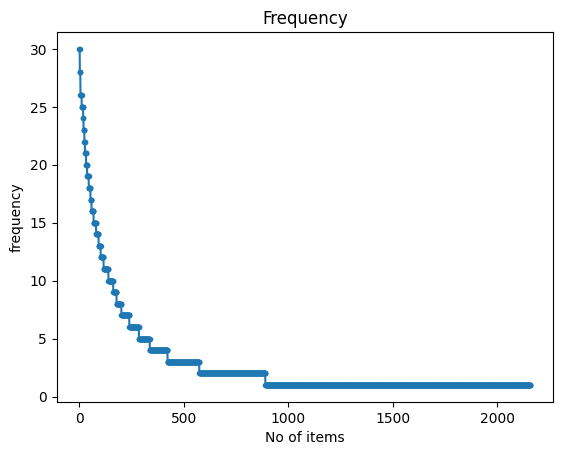

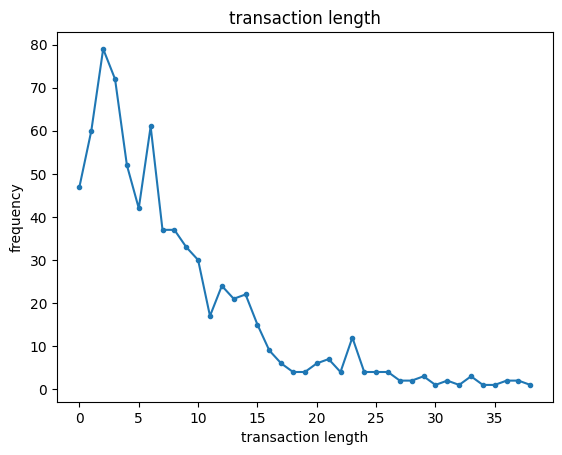

In [167]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.399463806970509
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.940834266064001
Variance in Transaction Sizes : 35.3408856181514
Sparsity : 0.9965660409619908


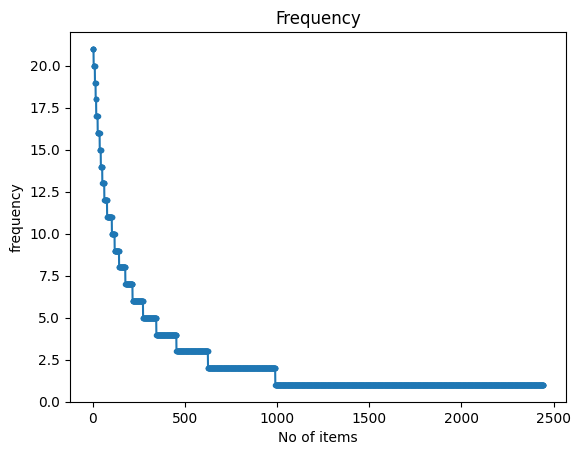

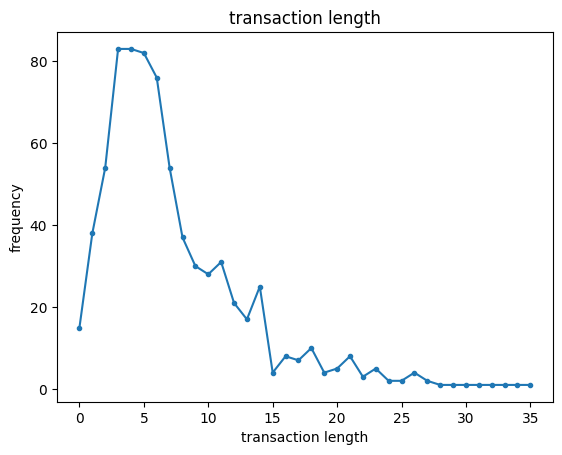

In [168]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [169]:
# Mining frequent patterns with FPGrowth algorithm for nostalgia label
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.011313438415527344


,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,go,28
178,takes,30


In [170]:
# Mining frequent patterns with FPGrowth algorithm for not_nostalgia label
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.008849143981933594


,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,every,21
140,loved,21
141,classic,21
142,them,21


In [175]:
#We group together all of the dataframes related to our found patterns
fpdfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for fpdf in fpdfs:
    for pattern in fpdf['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(fpdf) for fpdf in fpdfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for fpdf in fpdfs:
    filtered_df = fpdf[fpdf['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127    takes       30
125     ever       28
126    would       28
123       or       26
120      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [177]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
tdm = count_vect.fit_transform(df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [178]:
# exercise 17

# FAE Top-K
from PAMI.frequentPattern.topk import FAE  as alg

kCount=500  #Users can also specify this constraint between 0 to 1.
seperator='\t'
inputFile = "td_freq_db_nostalgia.csv"
obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process
obj.save(outFile=f'frequentPatternsMinSupCount{kCount}.txt')
frequentPatternsDF= obj.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

frequentPatternsDF

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.16578054428100586


,Patterns,Support
0,takes,30
1,favorite,30
2,ever,28
3,would,28
4,go,28
...,...,...
495,reason,3
496,whatever,3
497,artists,3
498,august,3


In [179]:
# MaxFPGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm

minimumSupportCount = 3  #minSup is specified in count. However, the users can also specify minSup between 0 and 1.
inputFile = "td_freq_db_nostalgia.csv"
obj = alg.MaxFPGrowth(iFile=inputFile, minSup=minimumSupportCount, sep='\t') #initialize
obj.mine()            #start the mining process

obj.save(f'maximalFrequentPatternsAtMinSupCount{minimumSupportCount}.txt') #save the patterns

frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

frequentPatternsDF

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 671
Runtime: 0.06525945663452148


,Patterns,Support
0,skating,3
1,walker,3
2,scott,3
3,17 1987,3
4,stop,3
...,...,...
666,only or,3
667,go or,3
668,ever only,3
669,would only,4


In [180]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

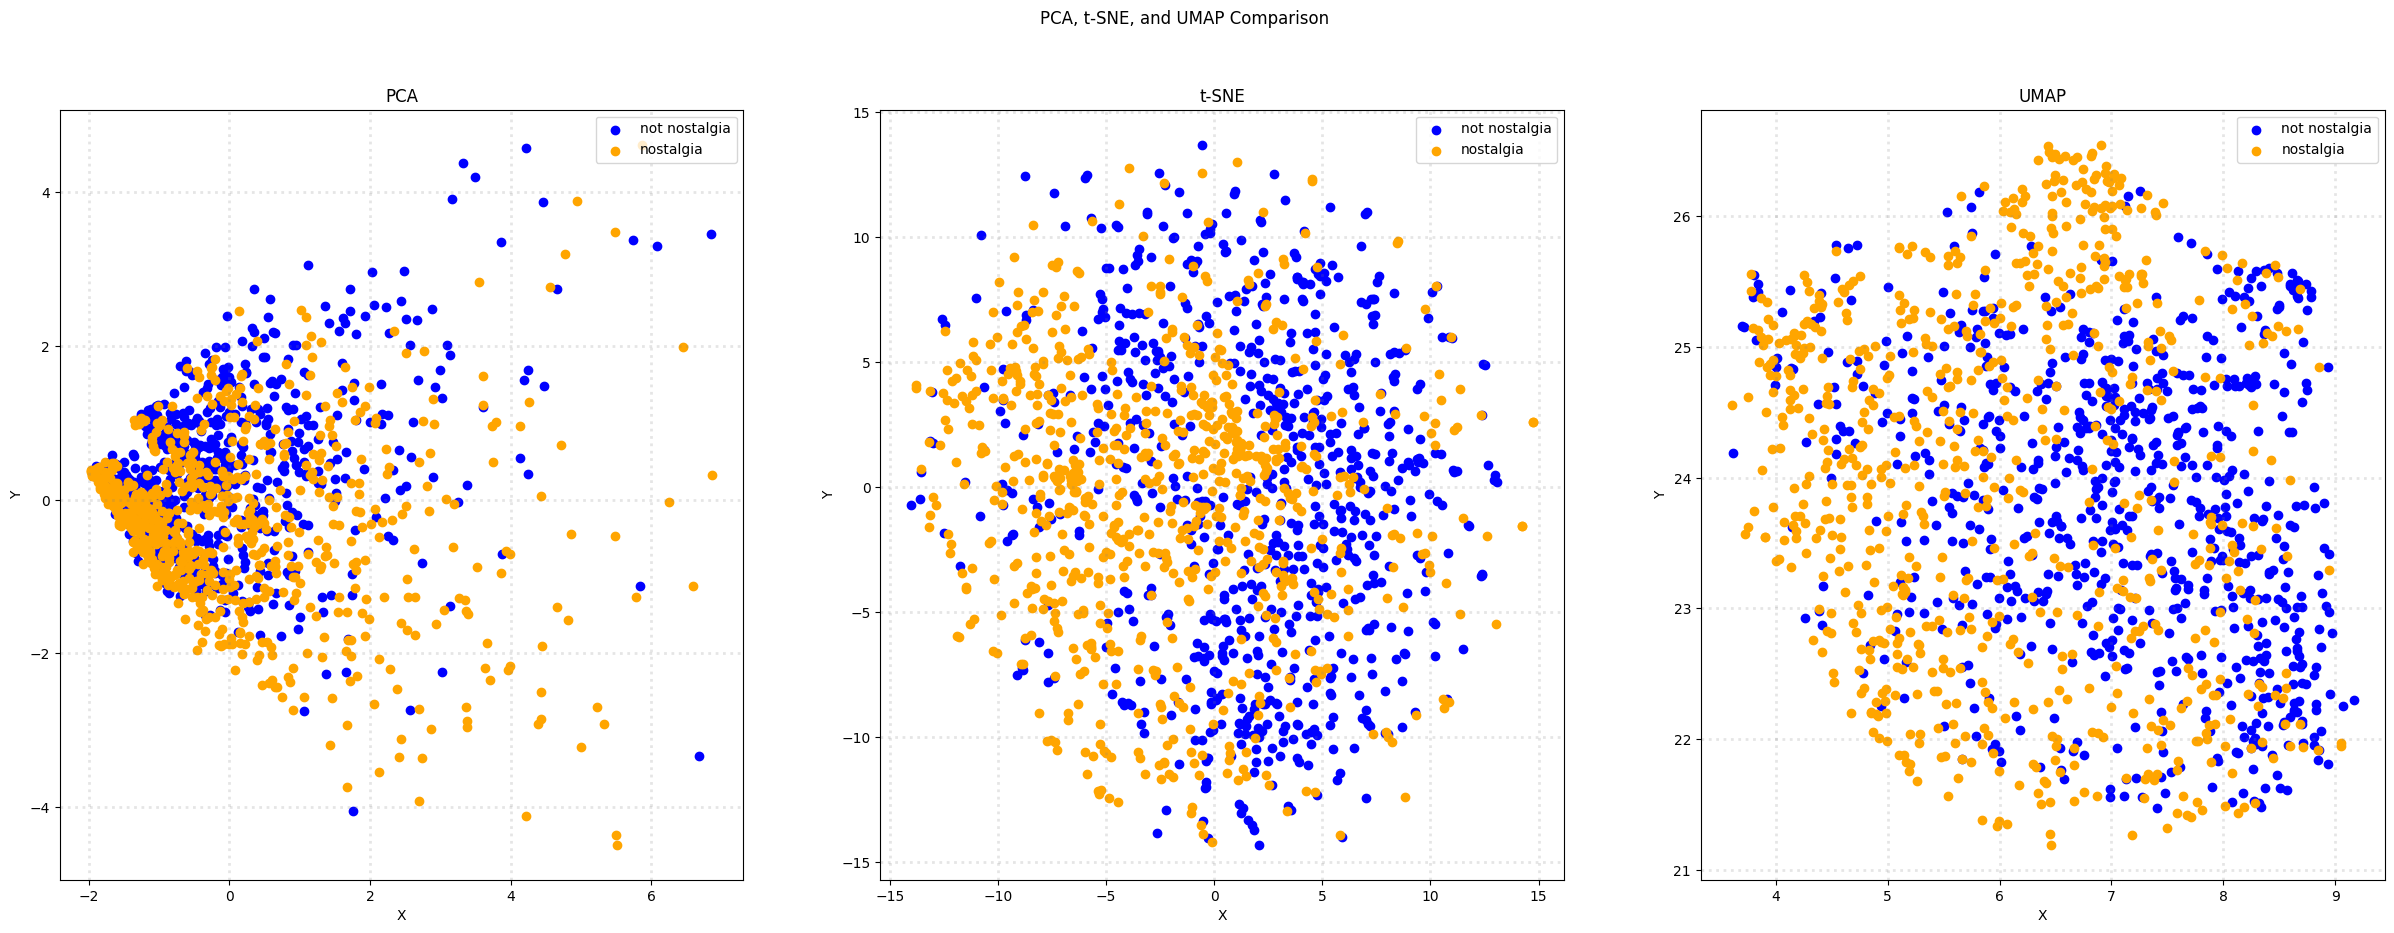

In [181]:
# Plot the results in subplots for term-document matrix dataframe
col = ['blue', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df["sentiment"] == category].T[0]
        ys = X_reduced[df["sentiment"] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], pca_tdm, 'PCA')
plot_scatter(axes[1], tsne_tdm, 't-SNE')
plot_scatter(axes[2], umap_tdm, 'UMAP')

plt.show()

In [182]:
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

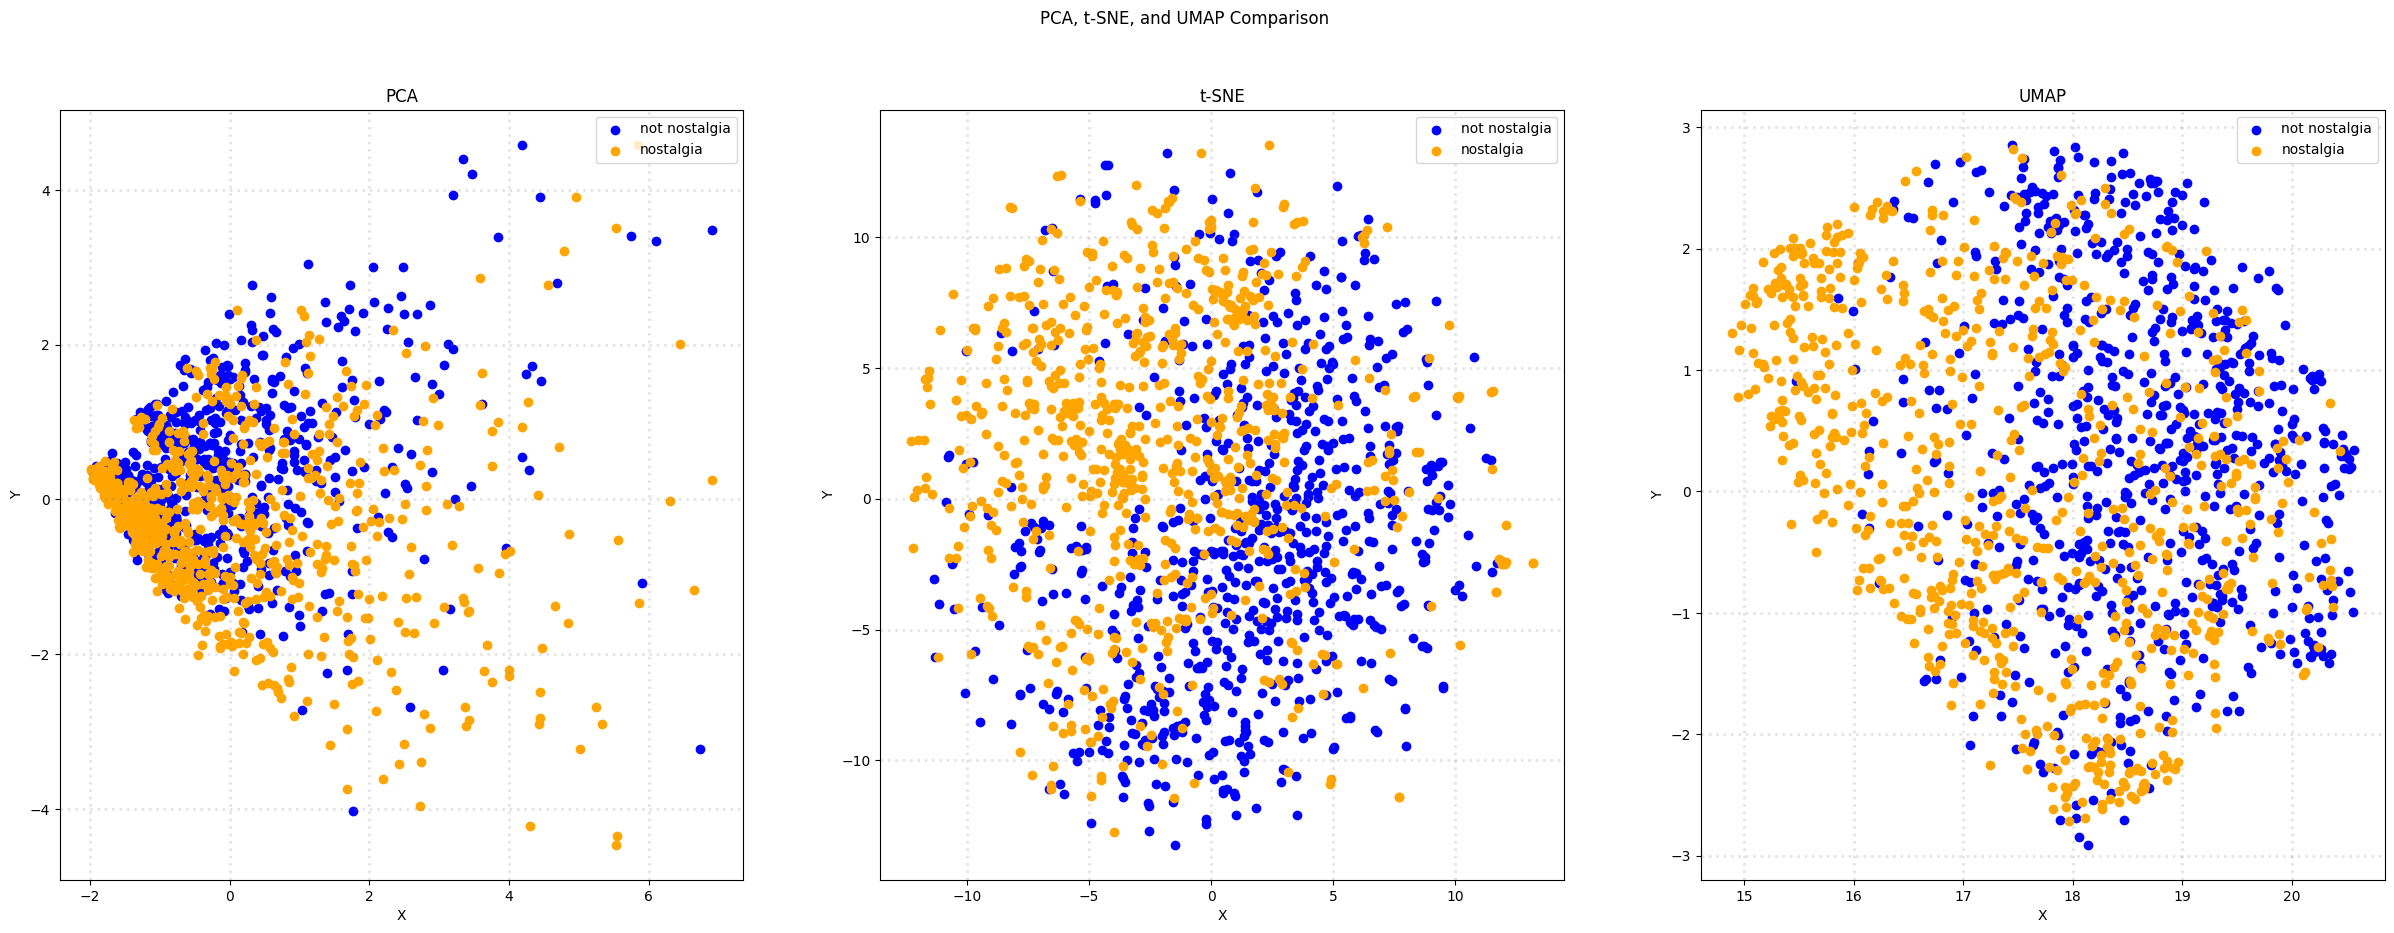

In [183]:
# Plot the results in subplots for augmented dataframe
col = ['blue', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df["sentiment"] == category].T[0]
        ys = X_reduced[df["sentiment"] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], pca_aug, 'PCA')
plot_scatter(axes[1], tsne_aug, 't-SNE')
plot_scatter(axes[2], umap_aug, 'UMAP')

plt.show()

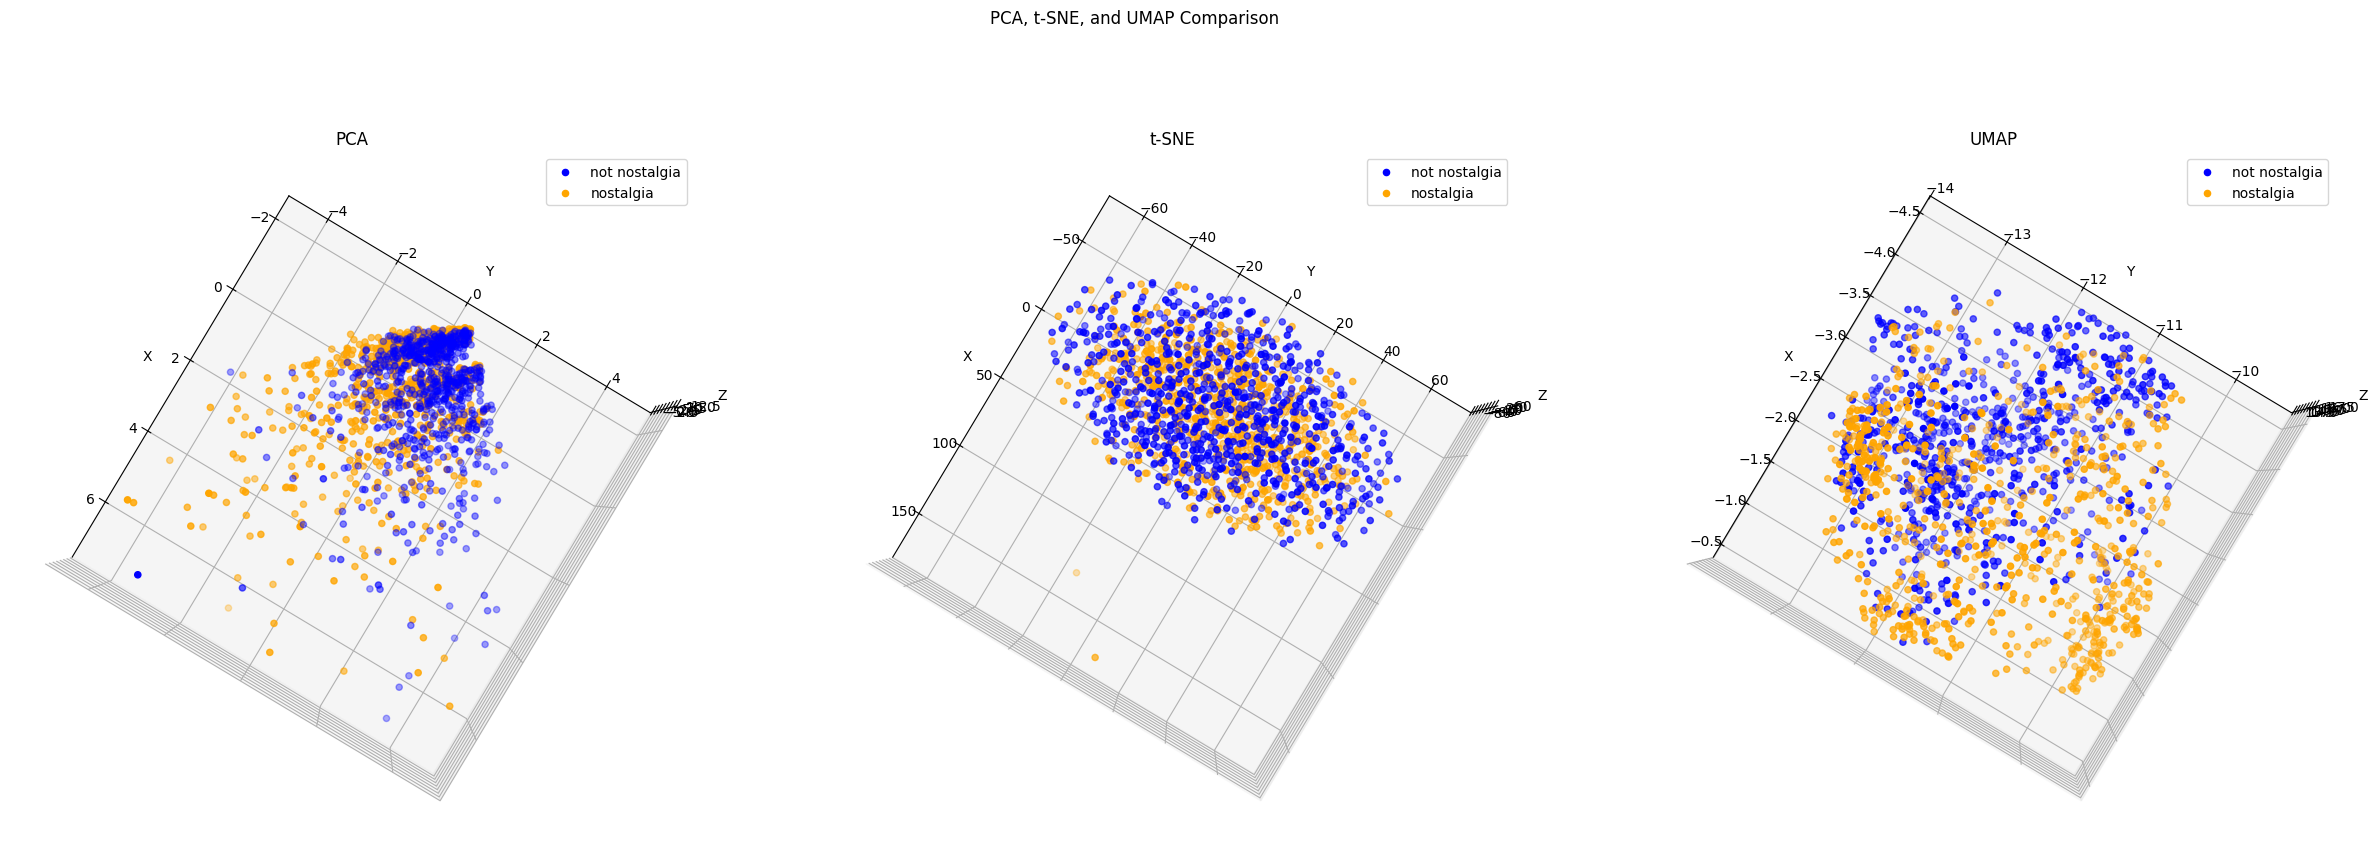

In [187]:
# exercise 18
from mpl_toolkits.mplot3d import Axes3D
pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Plot the results in subplots for augmented dataframe
col = ['blue', 'orange']
categories = df['sentiment'].unique() 

fig = plt.figure(figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
axes = []
axes.append(fig.add_subplot(131, projection='3d'))
axes.append(fig.add_subplot(132, projection='3d'))
axes.append(fig.add_subplot(133, projection='3d'))

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        zs = X_reduced[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
        ax.view_init(elev=90, azim=30) # set the viewpoint angle here
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], pca_aug, 'PCA')
plot_scatter(axes[1], tsne_aug, 't-SNE')
plot_scatter(axes[2], umap_aug, 'UMAP')

In [189]:
# Binarize the sentiment labels
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df["sentiment"])
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()
df[:9]

,sentiment,comment,unigrams,tokenized_comment,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{hear, voice, Reeves, now,, relaxed,, can, but...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{voice, Never, angel, love, was, to, beautiful...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{comforting, how, most, Reeves, little, grow, ...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{This, man, can, 1st, hope, convince, that, to...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{to, songs, him, my, of, who, me, mum, everyda...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi...","{over, voice, child,, it, appreciate, cry....b...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,...","{how, changes, it, then,, things., do, me, was...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{Reeves, 71, he, me, tunes, ALSO, love, to, ch...",[0]
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]","{are, you, Wherever, always, my, in, heart}",[1]


In [191]:
# Sample three records from the dataset
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [192]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [193]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_13496/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_13496/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_13496/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_13496/452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performin

In [197]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = {"nostalgia":0, "not nostalgia":1}

# Covert the category_mapping into list
target_names = ["nostalgia", "not nostalgia"]

# Convert the target text label into numerical label
df["sentiment_num"] = df["sentiment"].apply(lambda x: category_mapping[x])

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df["sentiment_num"], test_size=0.3, random_state=42)

In [198]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [199]:
#Model with only the augmented document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = {"nostalgia":0, "not nostalgia":1}

# Covert the category_mapping into list
target_names = ["nostalgia", "not nostalgia"]

# Convert the target text label into numerical label
df["sentiment_num"] = df["sentiment"].apply(lambda x: category_mapping[x])

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df["sentiment_num"], test_size=0.3, random_state=42)

In [200]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8155    0.9485    0.8770       233
not nostalgia     0.9330    0.7696    0.8434       217

     accuracy                         0.8622       450
    macro avg     0.8742    0.8590    0.8602       450
 weighted avg     0.8721    0.8622    0.8608       450



# **Third Part**

### data visualization with word cloud

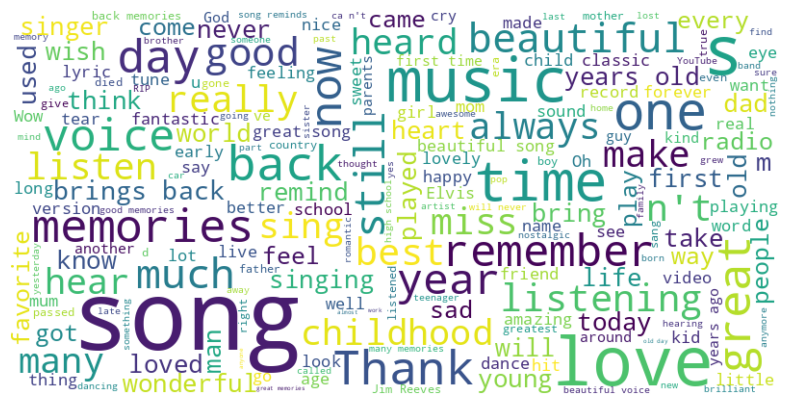

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

# convert the dataset into dataframe format
df = pd.DataFrame({"sentiment":dataset["train"]["sentiment"], "comment":dataset["train"]["comment"]})


def tokenize_text(df):
    tokens = []
    for text in df:
        for d in nltk.sent_tokenize(text, language='english'):
            for word in nltk.word_tokenize(d, language='english'):
                # filters here
                tokens.append(word)
    return tokens

all_text_tokens = " ".join(tokenize_text(df["comment"]))
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(all_text_tokens)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes for a cleaner look
plt.show()

### TF-IDF feature creation

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df["comment"].tolist()
tfidf_vect = TfidfVectorizer()
tfidf_mat = tfidf_vect.fit_transform(corpus)
feature_names = tfidf_vect.get_feature_names_out()
print(tfidf_mat.shape)

tfidf_df = pd.DataFrame(tfidf_mat.toarray(), columns=feature_names)
tfidf_aug_df = pd.concat([df, tfidf_df], axis=1)
tfidf_aug_df.tail(10)


(1500, 3730)


,sentiment,comment,00,000,045,07,10,100,10m,11,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1490,not nostalgia,"He really isn't my cup of tea, but some of his...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1491,nostalgia,real music...how i miss those days...brings ba...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1492,nostalgia,i used to cry over this song cause i had a boy...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1493,not nostalgia,"He really has that ""love you like a brother"" l...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494,not nostalgia,That's funny. But Leo really is a nice guy. He...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,nostalgia,I was born in 1954 and started to be aware of ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499,nostalgia,This is the first CD I bought after my marriag...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Use Gaussian Naive Bayes Classifier with TF-IDF features

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

# convert the dataset into dataframe format
df = pd.DataFrame({"sentiment":dataset["train"]["sentiment"], "comment":dataset["train"]["comment"]})

corpus = df["comment"].tolist()
tfidf_vect = TfidfVectorizer()
tfidf_mat = tfidf_vect.fit_transform(corpus)
feature_names = tfidf_vect.get_feature_names_out()
print(tfidf_mat.shape)

tfidf_df = pd.DataFrame(tfidf_mat.toarray(), columns=feature_names)

# Create a mapping from numerical labels to category names
category_mapping = {"nostalgia":0, "not nostalgia":1}

# Covert the category_mapping into list
target_names = ["nostalgia", "not nostalgia"]

# Convert the target text label into numerical label
tfidf_df["sentiment"] = df["sentiment"].apply(lambda x: category_mapping[x])

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, tfidf_df["sentiment"], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

(1500, 3730)
Accuracy: 1.0

Classification Report:
                precision    recall  f1-score   support

    nostalgia     1.0000    1.0000    1.0000       225
not nostalgia     1.0000    1.0000    1.0000       225

     accuracy                         1.0000       450
    macro avg     1.0000    1.0000    1.0000       450
 weighted avg     1.0000    1.0000    1.0000       450



### Use Multinomail Naive Bayes with term-document frequency as features

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

# convert the dataset into dataframe format
df = pd.DataFrame({"sentiment":dataset["train"]["sentiment"], "comment":dataset["train"]["comment"]})


corpus = df["comment"].tolist()
count_vect = CountVectorizer()
tdm = count_vect.fit_transform(corpus)
feature_names = count_vect.get_feature_names_out()
print(tdm.shape)

tdm_df = pd.DataFrame(tdm.toarray(), columns=feature_names)

# Create a mapping from numerical labels to category names
category_mapping = {"nostalgia":0, "not nostalgia":1}

# Covert the category_mapping into list
target_names = ["nostalgia", "not nostalgia"]

# Convert the target text label into numerical label
tdm_df["sentiment"] = df["sentiment"].apply(lambda x: category_mapping[x])

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, tdm_df["sentiment"], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

(1500, 3730)
Accuracy: 0.9577777777777777

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9725    0.9422    0.9571       225
not nostalgia     0.9440    0.9733    0.9584       225

     accuracy                         0.9578       450
    macro avg     0.9582    0.9578    0.9578       450
 weighted avg     0.9582    0.9578    0.9578       450



 When using TF-IDF values as features, GaussianNB can achieve perfect classification (accuracy = 1), while MultinomialNB performs slightly worse (accuracy = 0.98). However, when using term-document frequencies as features, the performance of both models is worse than when using TF-IDF features; moreover, MultinomialNB performs better than GaussianNB in this case. Additionally, even though I give `test_size` different values, GaussianNB can still get perfect performance with TD-IDF features.
 

# **Fourth Part**

- For the visualization part, a heatmap is too small to effectively show the significance of terms across all documents, even after selecting the top 20 terms as targets. For better usability, a heatmap can be used to show the correlation between labels and features in small to medium-sized datasets.
 
- For the feature reduction part, visualization is useful for displaying the distributions of different categories; however, we lack certain metrics, such as the Mean Silhouette Score, to assess the performance of these methods, especially when the distributions are intermixed and not easily recognizable.

# **Fifth Part**

- The second part does not contain all the cells from the first part, and I have simplified the code by combining some cells and removing redundant sections. However, the full process is still clearly implemented on the new dataset in the same order as in the first part.
 
- For certain cells in the second part that were originally take-home exercises, I’ve only added a comment stating `exercise #` without further explanation. Additionally, some exercise cells were removed as they were only meant to check the state of the dataset in the first part.